O(n)
O(n)
O(n log n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(log n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(1)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
O(n)
They are not suitable for insertion and deletion
They are not dynamic
They are not suitable for insertion and deletion
They are not dynamic
They are not dynamic
They are not dynamic
They are not memory-efficient
They are not dynamic
They are not suitable for insertion and deletion
They are not dynamic
They are not dynamic
They are not dynamic
They are not memory-efficient
They are not dynamic
They are not dynamic
They are not dynamic
They are not dynamic
They are not dynamic
They are not suitable for insertion and deletion
They are not dynamic
They are not dynamic
They are not dynamic
They are not memory-efficient
They are not dynamic
They are not suitable for insertion and deletion
They are not dynamic
They are not suitable for insertion and deletio

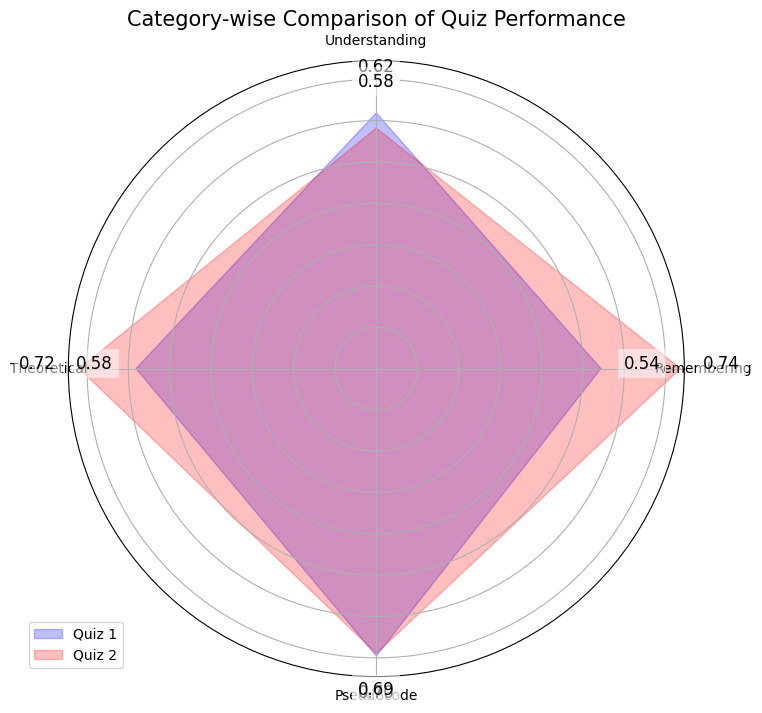

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the original quiz and test response CSV files
quiz_df = pd.read_csv('Module1_Notes_to_Quiz/quiz.csv')  # Change the file Path
test_response_df = pd.read_csv('Module2_Quiz_Analysis/Q1-Test_Response.csv')

# Load the re-quiz and test response CSV files
re_quiz_df = pd.read_csv('Module4_Create_Re_Quiz/quiz.csv')
re_quiz_test_response_df = pd.read_csv('Module5_Re-Quiz_Analysis/Q2-Test_Response.csv')

# Function to calculate average marks for a given quiz and responses
def calculate_average_marks(quiz_df, test_response_df):
    category_marks = {
        'Remembering': {'total': 0, 'count': 0},
        'Understanding': {'total': 0, 'count': 0},
        'Theoretical': {'total': 0, 'count': 0},
        'Pseudocode': {'total': 0, 'count': 0}
    }

    # Extract the categories and correct answers
    for _, row in quiz_df.iterrows():
        question = row['Question']
        correct_answer = row['Correct Answer'].strip()

        
        # Find the category based on the question text
        if '(Remembering)' in question:
            category = 'Remembering'
        elif '(Understanding)' in question:
            category = 'Understanding'
        elif '(Theoretical)' in question:
            category = 'Theoretical'
        elif '(Pseudocode)' in question:
            category = 'Pseudocode'
        
        # Check the answers in test_response_df
        for _, response in test_response_df.iterrows():
            student_response = response[question]
            
            # Increment the total for the category regardless of the answer
            category_marks[category]['count'] += 1

            print(student_response)
            print(correct_answer)
            
            # Increment the total marks if the response is correct
            if student_response == correct_answer:
                category_marks[category]['total'] += 1

    # Calculate average marks for each category
    average_marks = []
    for category in category_marks.keys():
        if category_marks[category]['count'] > 0:
            average = category_marks[category]['total'] / category_marks[category]['count']
        else:
            average = 0  # If no responses, average is 0
        average_marks.append(average)
    
    return average_marks

# Calculate average marks for the original quiz
original_quiz_avg_marks = calculate_average_marks(quiz_df, test_response_df)

print(original_quiz_avg_marks)

# Calculate average marks for the re-quiz
re_quiz_avg_marks = calculate_average_marks(re_quiz_df, re_quiz_test_response_df)

print(re_quiz_avg_marks)

# Prepare data for the spider chart
categories = ['Remembering', 'Understanding', 'Theoretical', 'Pseudocode']
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
original_quiz_avg_marks += original_quiz_avg_marks[:1]  # Close the circle for the original quiz
re_quiz_avg_marks += re_quiz_avg_marks[:1]  # Close the circle for the re-quiz
angles += angles[:1]  # Close the circle for angles

# Create a spider chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot the original quiz
ax.fill(angles, original_quiz_avg_marks, color='blue', alpha=0.25, label='Quiz 1')

# Plot the re-quiz
ax.fill(angles, re_quiz_avg_marks, color='red', alpha=0.25, label='Quiz 2')

# Set labels for the categories
ax.set_yticklabels([])  # Hide radial ticks
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add labels with the average marks, spaced out
for i, value in enumerate(original_quiz_avg_marks[:-1]):
    angle_rad = angles[i]
    ax.text(angle_rad, value + 0.1, f"{value:.2f}", horizontalalignment='center', size=12, bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

for i, value in enumerate(re_quiz_avg_marks[:-1]):
    angle_rad = angles[i]
    ax.text(angle_rad, value + 0.1, f"{value:.2f}", horizontalalignment='center', size=12, bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Add a title and legend
plt.title('Category-wise Comparison of Quiz Performance', size=15)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()

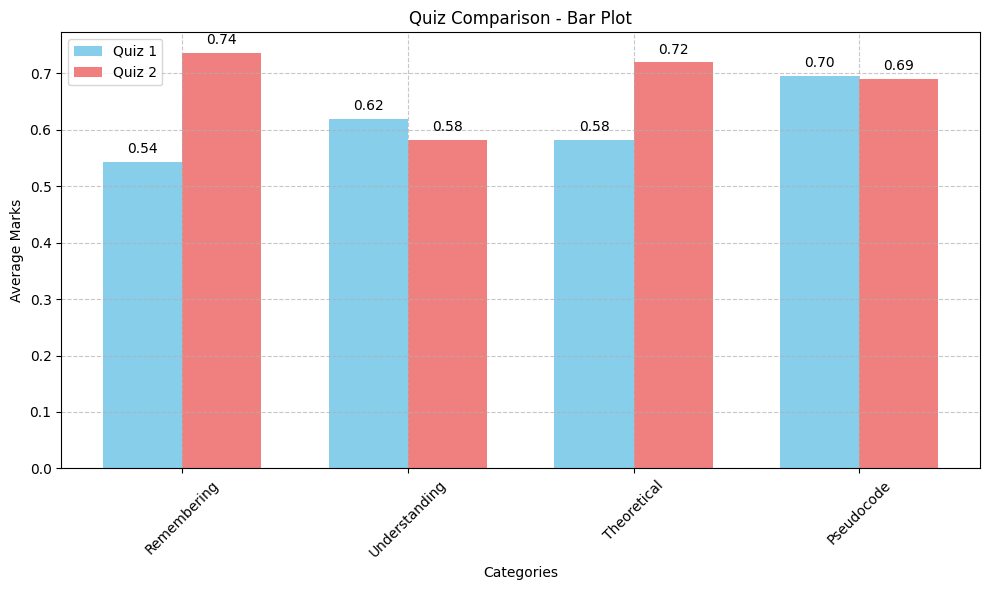

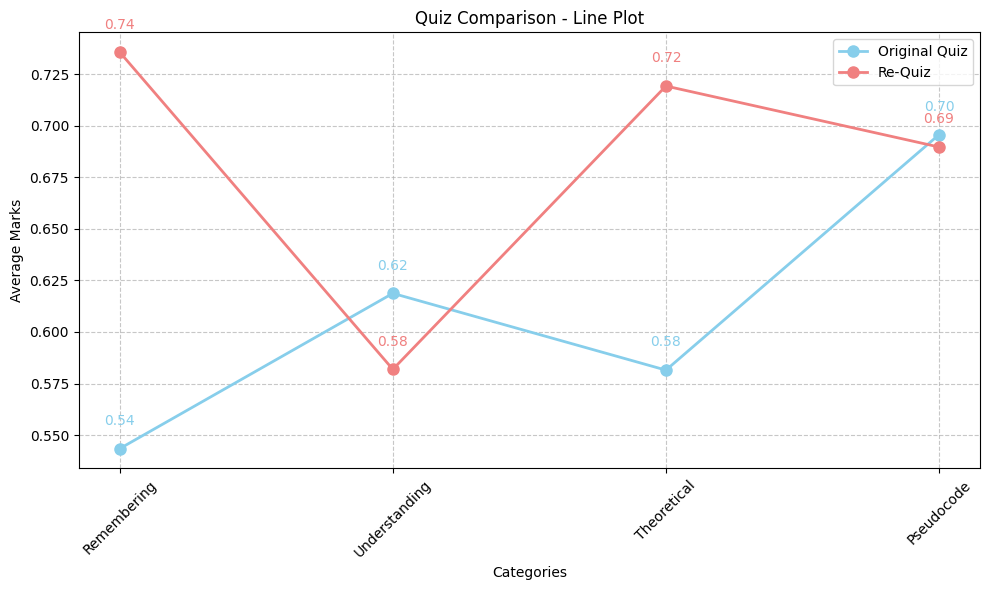

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the original quiz and test response CSV files
quiz_df = pd.read_csv('Module1_Notes_to_Quiz/quiz.csv')
test_response_df = pd.read_csv('Module2_Quiz_Analysis/Q1-Test_Response.csv')

# Load the re-quiz and test response CSV files
re_quiz_df = pd.read_csv('Module4_Create_Re_Quiz/quiz.csv')
re_quiz_test_response_df = pd.read_csv('Module5_Re-Quiz_Analysis/Q2-Test_Response.csv')

def calculate_average_marks(quiz_df, test_response_df):
    category_marks = {
        'Remembering': {'total': 0, 'count': 0},
        'Understanding': {'total': 0, 'count': 0},
        'Theoretical': {'total': 0, 'count': 0},
        'Pseudocode': {'total': 0, 'count': 0}
    }

    # Extract the categories and correct answers
    for _, row in quiz_df.iterrows():
        question = row['Question']
        correct_answer = row['Correct Answer'].strip()
        
        # Find the category based on the question text
        if '(Remembering)' in question:
            category = 'Remembering'
        elif '(Understanding)' in question:
            category = 'Understanding'
        elif '(Theoretical)' in question:
            category = 'Theoretical'
        elif '(Pseudocode)' in question:
            category = 'Pseudocode'
        
        # Check the answers in test_response_df
        for _, response in test_response_df.iterrows():
            student_response = response[question]
            category_marks[category]['count'] += 1
            
            if student_response == correct_answer:
                category_marks[category]['total'] += 1

    # Calculate average marks for each category
    average_marks = []
    for category in category_marks.keys():
        if category_marks[category]['count'] > 0:
            average = category_marks[category]['total'] / category_marks[category]['count']
        else:
            average = 0
        average_marks.append(average)
    
    return average_marks

# Calculate average marks for both quizzes
original_quiz_avg_marks = calculate_average_marks(quiz_df, test_response_df)
re_quiz_avg_marks = calculate_average_marks(re_quiz_df, re_quiz_test_response_df)

# Categories for x-axis
categories = ['Remembering', 'Understanding', 'Theoretical', 'Pseudocode']

# Bar Plot
plt.figure(figsize=(10, 6))
x = np.arange(len(categories))
width = 0.35

plt.bar(x - width/2, original_quiz_avg_marks, width, label='Quiz 1', color='skyblue')
plt.bar(x + width/2, re_quiz_avg_marks, width, label='Quiz 2', color='lightcoral')

plt.xlabel('Categories')
plt.ylabel('Average Marks')
plt.title('Quiz Comparison - Bar Plot')
plt.xticks(x, categories, rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i, v in enumerate(original_quiz_avg_marks):
    plt.text(i - width/2, v + 0.01, f'{v:.2f}', ha='center', va='bottom')
for i, v in enumerate(re_quiz_avg_marks):
    plt.text(i + width/2, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(categories, original_quiz_avg_marks, 'o-', label='Original Quiz', color='skyblue', linewidth=2, markersize=8)
plt.plot(categories, re_quiz_avg_marks, 'o-', label='Re-Quiz', color='lightcoral', linewidth=2, markersize=8)

plt.xlabel('Categories')
plt.ylabel('Average Marks')
plt.title('Quiz Comparison - Line Plot')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Add value labels on top of points
for i, v in enumerate(original_quiz_avg_marks):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', color='skyblue')
for i, v in enumerate(re_quiz_avg_marks):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', color='lightcoral')

plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


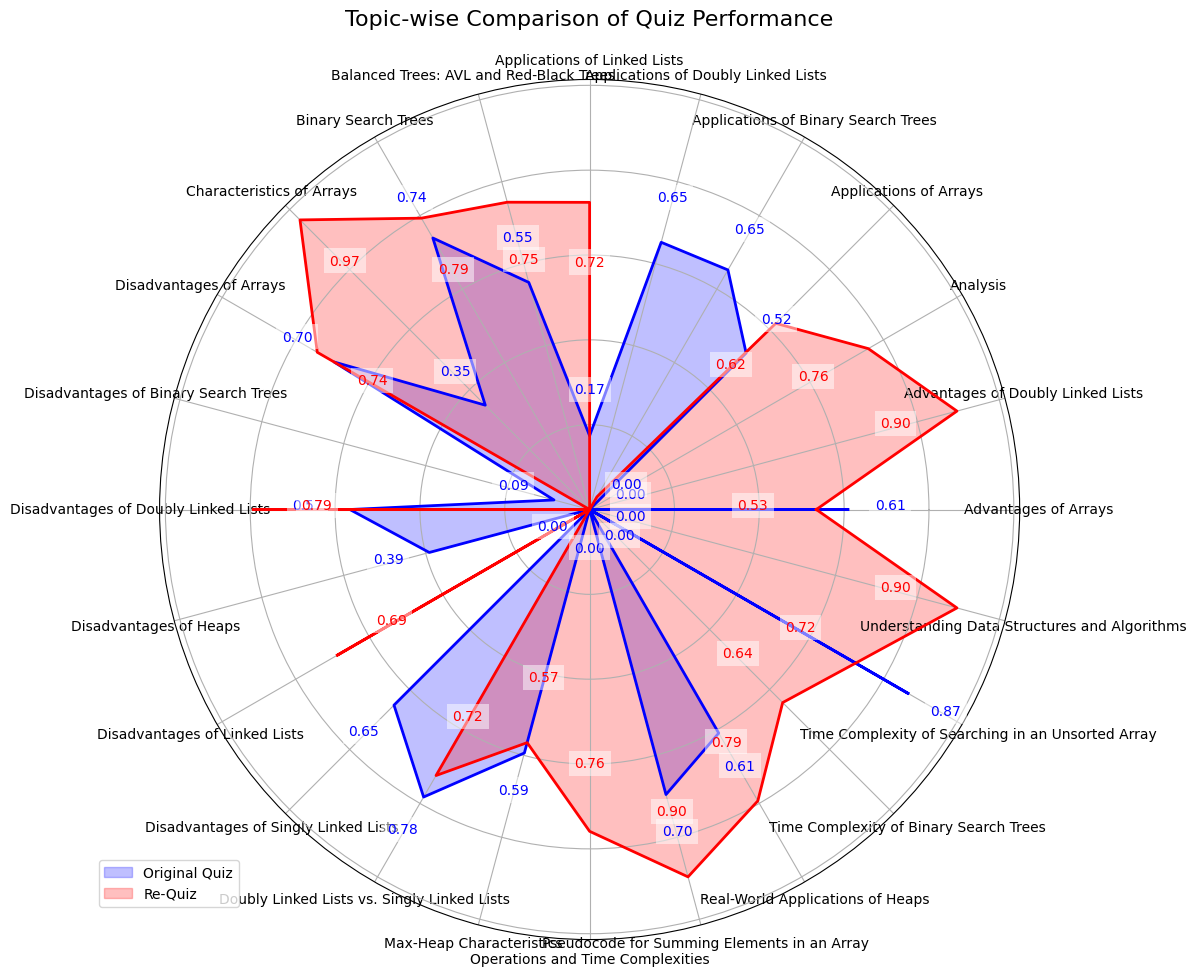

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

def calculate_topic_averages(quiz_df, test_response_df):
    topic_marks = {}
    
    # Extract the topics and correct answers
    for _, row in quiz_df.iterrows():
        question = row['Question'].strip()
        correct_answer = row['Correct Answer'].strip()
        
        # Extract the topic name dynamically
        topic_match = re.search(r'\)\s*(.*)', question)
        if topic_match:
            topic = topic_match.group(1).replace('(', '').replace(')', '').strip()
        else:
            topic = "Unknown"
            
        # Initialize the topic in the dictionary if not already present
        if topic not in topic_marks:
            topic_marks[topic] = {'total': 0, 'count': 0}
        
        # Check the answers in test_response_df
        for _, response in test_response_df.iterrows():
            student_response = response[question]
            topic_marks[topic]['count'] += 1
            
            if student_response == correct_answer:
                topic_marks[topic]['total'] += 1

    # Calculate average marks for each topic
    average_marks = {}
    for topic in topic_marks:
        if topic_marks[topic]['count'] > 0:
            average_marks[topic] = topic_marks[topic]['total'] / topic_marks[topic]['count']
        else:
            average_marks[topic] = 0
            
    return average_marks

# Load the original quiz and test response CSV files
quiz_df = pd.read_csv('Module1_Notes_to_Quiz/quiz.csv')
test_response_df = pd.read_csv('Module2_Quiz_Analysis/Q1-Test_Response.csv')

# Load the re-quiz and test response CSV files
re_quiz_df = pd.read_csv('Module4_Create_Re_Quiz/quiz.csv')
re_quiz_test_response_df = pd.read_csv('Module5_Re-Quiz_Analysis/Q2-Test_Response.csv')

# Calculate averages for both quizzes
original_averages = calculate_topic_averages(quiz_df, test_response_df)
re_quiz_averages = calculate_topic_averages(re_quiz_df, re_quiz_test_response_df)

# Get all unique topics from both quizzes
all_topics = sorted(set(list(original_averages.keys()) + list(re_quiz_averages.keys())))

# Prepare data for the spider chart
angles = np.linspace(0, 2 * np.pi, len(all_topics), endpoint=False).tolist()

# Create lists of marks, filling in 0 for missing topics
original_marks = [original_averages.get(topic, 0) for topic in all_topics]
re_quiz_marks = [re_quiz_averages.get(topic, 0) for topic in all_topics]

# Close the circles
original_marks += original_marks[:1]
re_quiz_marks += re_quiz_marks[:1]
angles += angles[:1]

# Create the spider chart
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

# Plot both quizzes
ax.fill(angles, original_marks, color='blue', alpha=0.25, label='Original Quiz')
ax.plot(angles, original_marks, color='blue', linewidth=2)

ax.fill(angles, re_quiz_marks, color='red', alpha=0.25, label='Re-Quiz')
ax.plot(angles, re_quiz_marks, color='red', linewidth=2)

# Customize the chart
ax.set_yticklabels([])  # Hide radial ticks
ax.set_xticks(angles[:-1])
ax.set_xticklabels(all_topics, fontsize=10)

# Add labels with the average marks for both quizzes
for i in range(len(all_topics)):
    angle_rad = angles[i]
    # Original quiz labels (slightly above the points)
    ax.text(angle_rad, original_marks[i] + 0.1, f"{original_marks[i]:.2f}", 
            horizontalalignment='center', color='blue', size=10,
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    
    # Re-quiz labels (slightly below the points)
    ax.text(angle_rad, re_quiz_marks[i] - 0.15, f"{re_quiz_marks[i]:.2f}",
            horizontalalignment='center', color='red', size=10,
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Add title and legend
plt.title('Topic-wise Comparison of Quiz Performance', fontsize=16, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.tight_layout()
plt.show()